### Finding out the probability that a member will default

In [1]:
''' 
Fetching all the required packages 
'''
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn import metrics
from sklearn import preprocessing


import warnings
warnings.filterwarnings("ignore")

### Fetching the train and test data 

- Taking a glance of the data.

In [2]:
pd.set_option('display.max_columns', None)
train_df = pd.read_csv(r"train_indessa.csv")
test_df=pd.read_csv("test_indessa.csv")
train_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


##### Checking all the data type and info of the dataset

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [4]:
## Checking the shape of the dataste
print(train_df.shape)
print(test_df.shape)

(532428, 45)
(354951, 44)


## Data Cleaning

- Identifying the missing data and using appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

- As we can see there are 532428 rows & 45 columns and 354951 & 44 in the train and test dataset , it will be very difficult to look at each column one by one & find the NA or missing values. So let's find out all columns where missing values are more than certain percentage, let's say 50%.

In [5]:
### Train Dataset
ColumnsWithNull_Train_Data=round(100*(train_df.isnull().sum()/len(train_df.index)),2)
ColumnsWithNull_Train_Data=ColumnsWithNull_Train_Data[ColumnsWithNull_Train_Data>50]
print("\n Number of Columns, where Null values are more than 50%: ",len(ColumnsWithNull_Train_Data.index))
print(ColumnsWithNull_Train_Data.index)


 Number of Columns, where Null values are more than 50%:  5
Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'verification_status_joint'],
      dtype='object')


In [6]:
### Test Dataset
ColumnsWithNull_Test_Data=round(100*(test_df.isnull().sum()/len(test_df.index)),2)
ColumnsWithNull_Test_Data=ColumnsWithNull_Test_Data[ColumnsWithNull_Test_Data>50]
print("\n Number of Columns, where Null values are more than 50%: ",len(ColumnsWithNull_Test_Data.index))
print(ColumnsWithNull_Test_Data.index)


 Number of Columns, where Null values are more than 50%:  5
Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'verification_status_joint'],
      dtype='object')


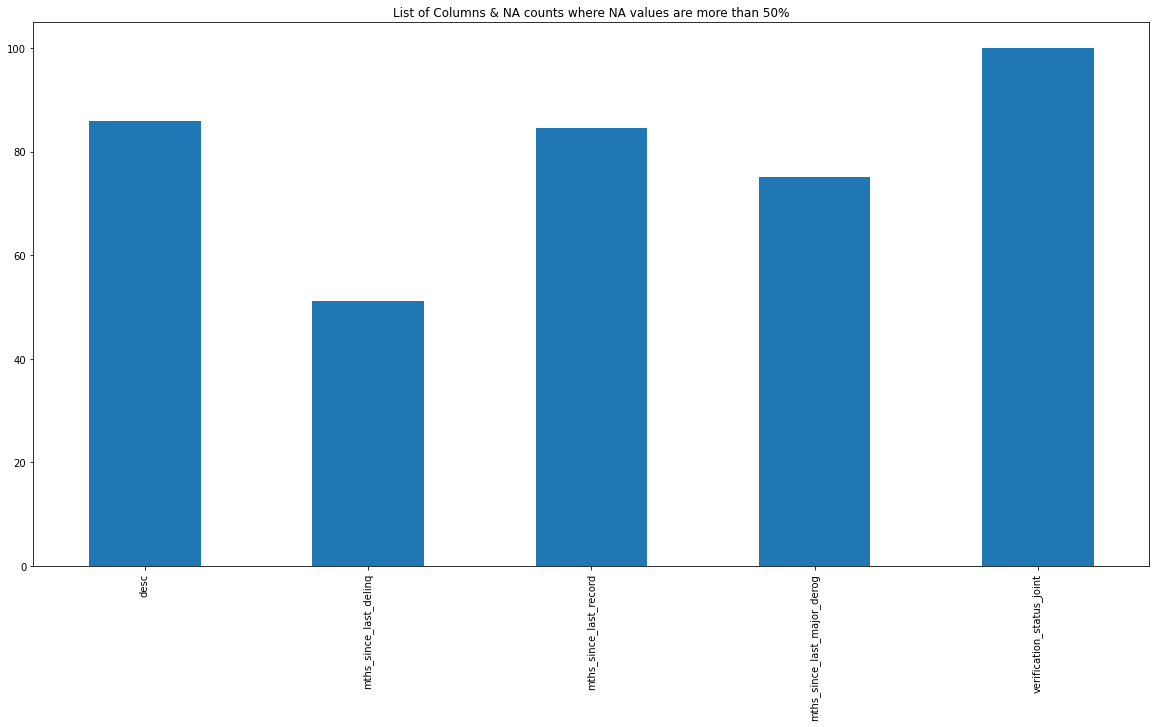

In [7]:
### Visualizing the null values
plt.figure(figsize = (20,10)) 
ColumnsWithNull_Train_Data.plot(kind='bar')

plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

In [8]:
'''
Defining a function for removing null columns and rows, which all are having more than 50% of null values.
'''
def CommonRemoveNull(dataFrame,axis=1,percentage=0.50):
    df=dataFrame.copy()
    ishape=df.shape
    if axis==0:
        rownames=df.transpose().isnull().sum()
        rownames=list(rownames[rownames.values>percentage*len(df)].index)
        df.drop(df.index[rownames],inplace=True)
        print("\nNumber of Rows Drops: ",len(rownames))
    else:
        colnames=(df.isnull().sum()/len(df))
        colnames=list(colnames[colnames.values>percentage].index)
        df.drop(labels=colnames,axis=1,inplace=True)
        print("\nNumber of Columns Drops: ",len(colnames))
    print("\nOld Dataset rows,columns",ishape,"\nNew Dataset rows,columns",df.shape)
    return df

##### Remove columns where NA values are more than or equal to 50%

In [9]:
train_clean_df=CommonRemoveNull(train_df)
test_clean_df=CommonRemoveNull(test_df)


Number of Columns Drops:  5

Old Dataset rows,columns (532428, 45) 
New Dataset rows,columns (532428, 40)

Number of Columns Drops:  5

Old Dataset rows,columns (354951, 44) 
New Dataset rows,columns (354951, 39)


##### Remove rows where NA values are more than or equal to 30%

In [10]:
train_clean_df=CommonRemoveNull(train_clean_df,axis=0,percentage = 0.3)
test_clean_df=CommonRemoveNull(test_clean_df,axis=0,percentage = 0.3)


Number of Rows Drops:  0

Old Dataset rows,columns (532428, 40) 
New Dataset rows,columns (532428, 40)

Number of Rows Drops:  0

Old Dataset rows,columns (354951, 39) 
New Dataset rows,columns (354951, 39)


In [11]:
print(100*(train_clean_df.isnull().sum()/len(train_clean_df.index)))
print(100*(test_clean_df.isnull().sum()/len(test_clean_df.index)))

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
batch_enrolled                15.992585
int_rate                       0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.791018
emp_length                     5.050636
home_ownership                 0.000000
annual_inc                     0.000563
verification_status            0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.016904
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.003005
inq_last_6mths                 0.003005
open_acc                       0.003005
pub_rec                        0.003005
revol_bal                      0.000000


##### We can see There are still some missing values. We will handle this with some synthetic data.

In [12]:
## Checking the duplicate count
train_clean_df.duplicated().value_counts()

False    532428
dtype: int64

#### Treating Mising values for all numeric variable and categorical values

In [13]:
## Fetching all numerical variable in the data
numerics = ['int64']

train_clean_df_Num=train_clean_df.select_dtypes(include=numerics)
train_clean_df_Num_float=train_clean_df.select_dtypes(include='float64')
print(train_clean_df_Num_float.columns)
test_clean_df_Num=test_clean_df.select_dtypes(include=numerics)
test_clean_df_Num_float=test_clean_df.select_dtypes(include='float64')
train_clean_df_Num.head()

Index(['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


,member_id,loan_amnt,funded_amnt,loan_status
0,58189336,14350,14350,0
1,70011223,4800,4800,0
2,70255675,10000,10000,0
3,1893936,15000,15000,0
4,7652106,16000,16000,0


In [14]:
train_clean_df[train_clean_df_Num_float.isna().any(axis=1)]


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
21,1699807,12400,12400,12400.00,36 months,BAT1135695,6.62,A,A2,Expeditors,2 years,OWN,40000.0,Not Verified,n,debt_consolidation,Debt consolidation,114xx,NY,20.31,0.0,2.0,6.0,0.0,1804.0,12.2,9.0,f,0.00,0.00,712.76,7.0300,0.0,INDIVIDUAL,NAth week,0.0,NaN,NaN,NaN,0
47,1561871,20000,20000,19725.00,36 months,,13.67,B,B5,Credit Suisse,4 years,RENT,168000.0,Verified,n,debt_consolidation,Grateful Getting Out of Debt For Good,100xx,NY,22.32,0.0,0.0,5.0,0.0,24080.0,80.0,19.0,f,4255.21,68.04,750.11,134.7958,0.0,INDIVIDUAL,135th week,0.0,NaN,NaN,NaN,0
66,1665246,16000,16000,15975.00,36 months,NaN,6.03,A,A1,Merrill Lynch,4 years,MORTGAGE,75000.0,Verified,n,small_business,Business funding,770xx,TX,4.83,0.0,0.0,6.0,0.0,1079.0,2.9,8.0,f,1438.43,0.00,0.00,0.0000,0.0,INDIVIDUAL,117th week,0.0,NaN,NaN,NaN,1
67,1604702,35000,35000,34975.00,36 months,BAT3943761,19.72,D,D5,NaN,10+ years,MORTGAGE,140000.0,Verified,n,small_business,Business,195xx,PA,30.35,0.0,1.0,16.0,0.0,88474.0,80.1,47.0,f,11640.25,0.00,0.00,0.0000,0.0,INDIVIDUAL,156th week,0.0,NaN,NaN,NaN,1
74,1605934,1000,1000,1000.00,36 months,BAT3943761,12.12,B,B3,NFI Industries,8 years,RENT,40000.0,Verified,n,vacation,Vacation,437xx,OH,31.77,0.0,0.0,12.0,0.0,15686.0,93.4,21.0,f,197.41,0.00,0.00,0.0000,0.0,INDIVIDUAL,156th week,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532387,615383,5000,5000,4975.00,36 months,BAT4786748,7.14,A,A3,East Coast Honda - VW,10+ years,OWN,100000.0,Not Verified,n,major_purchase,Great Credit,295xx,SC,3.14,0.0,0.0,16.0,0.0,3204.0,7.6,58.0,f,535.94,0.00,0.00,0.0000,0.0,INDIVIDUAL,126th week,0.0,NaN,NaN,NaN,1
532391,969374,35000,35000,34975.00,60 months,BAT1691418,20.62,F,F2,IBM,5 years,MORTGAGE,130000.0,Verified,n,home_improvement,Backyard,440xx,OH,21.16,0.0,0.0,16.0,0.0,31831.0,93.6,41.0,f,19703.83,0.00,0.00,0.0000,0.0,INDIVIDUAL,196th week,0.0,NaN,NaN,NaN,1
532392,1575132,9400,9400,9400.00,36 months,BAT3292317,9.76,B,B1,NaN,5 years,RENT,47000.0,Not Verified,n,other,Accounts,280xx,NC,1.15,0.0,0.0,11.0,1.0,1192.0,7.6,26.0,f,494.98,0.00,445.95,4.2100,0.0,INDIVIDUAL,31th week,0.0,NaN,NaN,NaN,0
532410,272515,9700,9700,8283.54,36 months,,14.82,E,E3,Hilton Hotels,1 year,RENT,37500.0,Not Verified,n,debt_consolidation,consolidate bills,088xx,NJ,27.04,0.0,5.0,12.0,0.0,26221.0,78.6,30.0,f,2367.53,0.00,0.00,0.0000,0.0,INDIVIDUAL,156th week,0.0,NaN,NaN,NaN,1


In [15]:
for col in train_clean_df_Num_float.columns:
    train_clean_df[col].fillna(train_clean_df[col].mean(),inplace=True)

for col in test_clean_df_Num_float.columns:
    test_clean_df[col].fillna(test_clean_df[col].mean(),inplace=True)


In [16]:
## Fetching Categorical data
categorical = ['category', 'object']
train_clean_df_cat=train_clean_df.select_dtypes(include=categorical)
test_clean_df_cat=test_clean_df.select_dtypes(include=categorical)
train_clean_df_cat.head()

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,36 months,,E,E3,clerk,9 years,OWN,Source Verified,n,debt_consolidation,Debt consolidation,349xx,FL,f,INDIVIDUAL,26th week
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,home_improvement,Home improvement,209xx,MD,w,INDIVIDUAL,9th week
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,debt_consolidation,Debt consolidation,447xx,OH,w,INDIVIDUAL,9th week
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,debt_consolidation,Debt consolidation,221xx,VA,f,INDIVIDUAL,135th week
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,credit_card,refi,900xx,CA,w,INDIVIDUAL,96th week


##### For numerical data, filling null value with mean

In [17]:
train_clean_df[train_clean_df_Num.columns].fillna(train_clean_df_Num.mean(),inplace=True)
#train_clean_df[train_clean_df_Num_float.columns].fillna(train_clean_df_Num_float.mean(),inplace=True)
test_clean_df[test_clean_df_Num.columns].fillna(test_clean_df_Num.mean(),inplace=True)

##### For categorical data, filling null value with mode 

In [18]:

for col in train_clean_df_cat.columns:
    
    train_clean_df[col].fillna(train_clean_df[col].value_counts().index[0],inplace=True)
    
for col in test_clean_df_cat.columns:
    
    test_clean_df[col].fillna(test_clean_df[col].value_counts().index[0],inplace=True)

In [19]:
print(100*(train_clean_df.isnull().sum()/len(train_clean_df.index)))
print(100*(test_clean_df.isnull().sum()/len(test_clean_df.index)))

member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
batch_enrolled                0.0
int_rate                      0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
pymnt_plan                    0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
initial_list_status           0.0
total_rec_int                 0.0
total_rec_late

### Data Preparation and Feature Engineering

In [20]:
from sklearn import preprocessing

In [23]:
train_clean_df_cat.head()

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,36 months,,E,E3,clerk,9 years,OWN,Source Verified,n,debt_consolidation,Debt consolidation,349xx,FL,f,INDIVIDUAL,26th week
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,home_improvement,Home improvement,209xx,MD,w,INDIVIDUAL,9th week
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,debt_consolidation,Debt consolidation,447xx,OH,w,INDIVIDUAL,9th week
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,debt_consolidation,Debt consolidation,221xx,VA,f,INDIVIDUAL,135th week
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,credit_card,refi,900xx,CA,w,INDIVIDUAL,96th week


In [26]:
train_clean_df[train_clean_df_cat.columns]=train_clean_df[train_clean_df_cat.columns].astype('category')

In [29]:
train_clean_df.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                          category
batch_enrolled                category
int_rate                       float64
grade                         category
sub_grade                     category
emp_title                     category
emp_length                    category
home_ownership                category
annual_inc                     float64
verification_status           category
pymnt_plan                    category
purpose                       category
title                         category
zip_code                      category
addr_state                    category
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util               

#### Encoding categorical features with label encoding

In [30]:


le = preprocessing.LabelEncoder()
#train_clean_df[train_clean_df_cat.columns] = le.fit_transform(train_clean_df_cat.astype(str))
train_clean_df[train_clean_df_cat.columns] = train_clean_df[train_clean_df_cat.columns].apply(le.fit_transform)

In [31]:
train_clean_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,0,0,19.19,4,22,166902,9,4,28700.0,1,0,2,10357,333,9,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,0,62,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,0,9,10.99,1,8,68595,10,1,65000.0,1,0,4,16026,195,20,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,0,96,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,0,9,7.26,0,3,46755,2,4,45000.0,0,0,2,10357,427,35,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,0,96,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,0,80,19.72,3,19,154077,1,5,105000.0,0,0,2,10357,206,45,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,0,13,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,0,35,10.64,1,6,77455,1,5,52000.0,2,0,1,38258,821,4,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,0,95,0.0,0.0,47159.0,47033.0,0


In [32]:
test_clean_df[test_clean_df_cat.columns] = test_clean_df[test_clean_df_cat.columns].apply(le.fit_transform)

In [33]:
test_clean_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,1,48,16.24,2,14,27658,4,4,73500.0,1,0,1,27945,425,35,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,0,3915.61,0.0,0.0,0.0,0.0,0,2,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,1,38,9.49,1,6,91075,5,0,105000.0,1,0,6,13629,256,27,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,1,1495.06,0.0,0.0,0.0,0.0,0,75,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,1,42,15.61,3,15,26520,1,4,62300.0,0,0,2,7249,615,16,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,1,2096.21,0.0,0.0,0.0,0.0,0,79,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,1,47,12.69,2,11,848,1,3,150000.0,1,0,2,7249,868,4,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,0,1756.31,0.0,0.0,0.0,0.0,0,48,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,0,0,6.89,0,2,74128,5,0,52000.0,0,0,6,13629,642,18,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,1,172.21,0.0,0.0,0.0,0.0,0,48,0.0,0.0,234278.0,26700.0


#### First, let's look at the overall default rate.

In [34]:

train_clean_df['loan_status'].value_counts()


0    406601
1    125827
Name: loan_status, dtype: int64

In [35]:
print('The overall default rate is about ',100 *(round(np.mean(train_clean_df['loan_status']),2)))

The overall default rate is about  24.0


The client with payment difficulties:  24 %
All other cases:  76 %


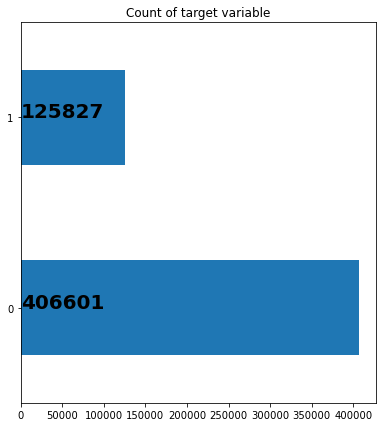

In [36]:
print('The client with payment difficulties: ',round(100*train_clean_df['loan_status'].sum()/len(train_clean_df['loan_status'])),'%')
print('All other cases: ',100-round(100*train_clean_df['loan_status'].sum()/len(train_clean_df['loan_status'])),'%')
plt.figure(figsize=(14,7))
plt.subplot(122)
ax = train_clean_df["loan_status"].value_counts().plot(kind="barh")

for i,j in enumerate(train_clean_df["loan_status"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

#### Features with Multi-colinearity

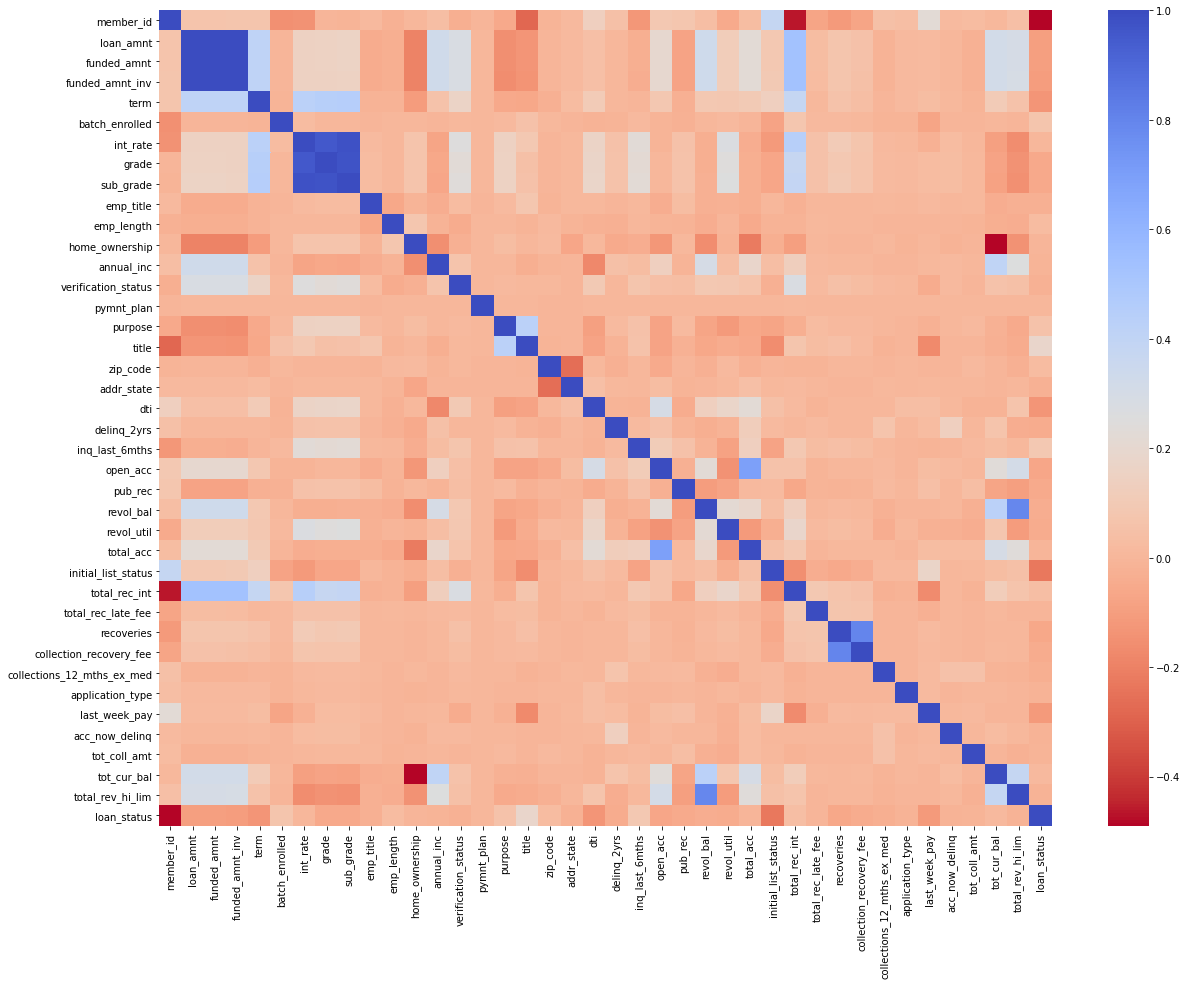

In [37]:
plt.figure(figsize=(20,15))
corr=train_clean_df.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':20})
plt.show()

### Splitting of data into train and test set

In [38]:
from sklearn import model_selection
X=train_clean_df.drop(['loan_status'],axis=1)
y=train_clean_df['loan_status']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

### Scaling of the data

In [39]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(X_train)
x_train_scaled= DataFrame(data=x_train_scaled,columns=X_train.columns)

In [40]:
x_train_scaled.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.651304,-0.562781,-0.561536,-0.555957,-0.653763,-0.879615,-1.107489,-1.369165,-1.071030,1.244363,0.781408,1.091170,-0.456109,-1.297555,-0.003349,-0.250658,-0.322710,-0.537648,-0.932768,0.504559,1.958257,-0.697846,1.024250,-0.332005,-0.555771,-1.652702,0.905929,-0.970692,-0.348481,-0.096202,-0.111425,-0.07702,-0.107853,-0.024154,0.949110,-0.065199,-0.110698,-0.820417,-0.078527
1,-1.022124,-0.325546,-0.324150,-0.318925,-0.653763,-0.879615,-0.057520,-0.607428,-0.455040,1.603718,-0.800424,1.091170,-0.314545,-1.297555,-0.003349,-0.250658,2.894368,1.287582,-1.262778,-1.096333,-0.365373,0.307560,-0.291448,1.375575,-0.101217,0.254078,-0.698081,-0.970692,0.161883,-0.096202,-0.111425,-0.07702,-0.107853,-0.024154,1.047884,-0.065199,-0.110698,-0.847619,-0.229423
2,0.679973,-1.464275,-1.463602,-1.456681,-0.653763,-0.783885,-0.125996,0.154309,0.006952,1.270382,-0.800424,0.570837,-0.314545,-1.297555,-0.003349,4.144593,2.435128,-1.040197,0.981287,-0.908906,1.958257,-0.697846,-0.667362,-0.332005,-0.159186,0.078067,-0.191551,1.030193,-0.750079,-0.096202,-0.111425,-0.07702,-0.107853,-0.024154,0.389396,-0.065199,-0.110698,-0.820974,-0.243659
3,-0.765450,2.402659,2.405787,2.406950,-0.653763,1.992269,-0.285774,-0.607428,-0.609038,-0.722280,-0.800424,-0.990163,2.752664,1.227052,-0.003349,-0.250658,-0.322710,-0.551608,-0.932768,-0.990084,-0.365373,0.307560,0.272422,-0.332005,3.042795,-2.306456,1.074773,-0.970692,1.807856,-0.096202,-0.111425,-0.07702,-0.107853,-0.024154,1.047884,-0.065199,0.396316,3.366423,2.720170
4,-1.042437,-1.037252,-1.036307,-1.030023,-0.653763,-0.879615,-1.219334,-1.369165,-1.225027,0.808527,0.465041,1.091170,0.471919,-1.297555,-0.003349,-0.250658,0.064827,-1.281002,0.717280,-0.291709,-0.365373,1.312966,0.836293,-0.332005,-0.360544,-1.610795,-0.191551,1.030193,-0.510084,-0.096202,-0.111425,-0.07702,-0.107853,-0.024154,-1.816537,-0.065199,-0.110698,-0.626942,0.616165


In [41]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled=DataFrame(data=X_test_scaled,columns=X_test.columns)

In [42]:
test_clean_df_scaled= scaler.transform(test_clean_df)
test_clean_df_scaled=DataFrame(data=test_clean_df_scaled,columns=test_clean_df.columns)

### Model Building

In [43]:
# Let's implement simple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
##from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score 
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import ADASYN
#from imblearn.ensemble import BalancedRandomForestClassifier

In [44]:
def RandomForest(x_train, y_train, x_test,y_test):
    #std_scale = RobustScaler()
    #pipeline=Pipeline([('scaler',StandardScaler()),('rf',RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True,n_estimators = 20))])
    #X_train_scaled = std_scale.fit_transform(x_train)
    #X_test_scaled = std_scale.transform(x_test)
   # print(x_train)
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True,n_estimators = 60)
    y_test_pred=rfc.fit(x_train,y_train).predict(x_test)
    print(rfc,'\n')
    print(confusion_matrix(y_test,y_test_pred),'\n')
    print('Accuracy Score : ',accuracy_score(y_test,y_test_pred),'\n')
    print('AUC - ROC :',roc_auc_score(y_test,y_test_pred),'\n')
    print(classification_report(y_test,y_test_pred),'\n')
    return rfc


def XGBoostClassifier(x_train, y_train, x_test,y_test):
    std_scale = RobustScaler()
    #pipeline=Pipeline([('scaler',StandardScaler()),('rf',RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True,n_estimators = 20))])
    X_train_scaled = std_scale.fit_transform(x_train)
    X_test_scaled = std_scale.transform(x_test)
    print(sum(y_train==0))
    print(sum(y_train==1))
    spw=(sum(y_train==0)/sum(y_train==1))-10
    xgb=XGBClassifier(learning_rate=0.1, n_estimators=20, objective='binary:logistic',
                            silent=True, nthread=-1,random_state=42,gamma=0.5,subsample=0.7,scale_pos_weight=spw)
    y_test_pred=xgb.fit(X_train_scaled,y_train).predict(X_test_scaled)
    print(xgb,'\n')
    print(confusion_matrix(y_test,y_test_pred),'\n')
    print('Accuracy Score : ',accuracy_score(y_test,y_test_pred),'\n')
    print('AUC - ROC :',roc_auc_score(y_test,y_test_pred),'\n')
    print(classification_report(y_test,y_test_pred),'\n')
    return xgb

def NaiveBayesClassifier(x_train, y_train, x_test,y_test):
    gnb=GaussianNB(var_smoothing=1e-9)
    y_test_pred=gnb.fit(x_train,y_train).predict(x_test)
    print(gnb,'\n')
    print(confusion_matrix(y_test,y_test_pred),'\n')
    print('Accuracy Score : ',accuracy_score(y_test,y_test_pred),'\n')
    print('AUC - ROC :',roc_auc_score(y_test,y_test_pred),'\n')
    print(classification_report(y_test,y_test_pred),'\n')
    return gnb

def SupportVectorClassifier(x_train, y_train, x_test,y_test):
    svc=SVC(gamma=10,C=0.1)
    y_test_pred=svc.fit(x_train,y_train).predict(x_test)
    print(svc,'\n')
    print(confusion_matrix(y_test,y_test_pred),'\n')
    print('Accuracy Score : ',accuracy_score(y_test,y_test_pred),'\n')
    print('AUC - ROC :',roc_auc_score(y_test,y_test_pred),'\n')
    print(classification_report(y_test,y_test_pred),'\n')
    return svc


#### With Cross Validations

def RandomForestWithCV(x_train, y_train, x_test,y_test):
    rfc_params = {'n_estimators': [20], 'max_features': ['auto', 'sqrt', 'log2'], 
                     'max_depth' : [4,8],'criterion' :['gini', 'entropy'], 'min_samples_leaf':[1,2,3,4,5,10,20],
                 #'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]
                 }
    grid_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1), param_grid=rfc_params, scoring='roc_auc', cv=3, verbose=3)
    grid_rfc.fit(x_train, y_train)
# rfc best estimator
    rfc_clf = grid_rfc.best_estimator_
    y_test_pred=rfc_clf.predict(x_test)
    print('Optimum Hyperparameters:',rfc_clf)
    print(confusion_matrix(y_test,y_test_pred),'\n')
    print('Accuracy Score : ',accuracy_score(y_test,y_test_pred),'\n')
    print('AUC - ROC :',roc_auc_score(y_test,y_test_pred),'\n')
    print(classification_report(y_test,y_test_pred),'\n')
    return rfc_clf

def XGBoostClassifierWithCV(x_train, y_train, x_test,y_test):
    params = {'min_child_weight': [1, 5, 10], 'gamma': [0.5, 2, 5], 'subsample': [0.7, 1.0],
                  'colsample_bytree': [0.5, 1.0], 'max_depth': [3, 5],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
    xgb = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=5, objective='binary:logistic',
                            silent=True, nthread=-1,random_state=42,n_jobs=-1,colsample_bytree=0.8,subsample=0.8)
    grid_xgb = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', cv=3, verbose=3)
    grid_xgb.fit(x_train, y_train)
# xgb best estimator
    xgb_clf = grid_xgb.best_estimator_
    y_test_pred=xgb_clf.predict(x_test)
    print('Optimum Hyperparameters:',xgb_clf)
    print(confusion_matrix(y_test,y_test_pred),'\n')
    print('Accuracy Score : ',accuracy_score(y_test,y_test_pred),'\n')
    print('AUC - ROC :',roc_auc_score(y_test,y_test_pred),'\n')
    print(classification_report(y_test,y_test_pred),'\n')
    return xgb_clf
    
def GaussianNBWithCV(x_train, y_train, x_test,y_test):
    gnb_params = {"var_smoothing" : [1e-9,1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
    grid_gnb = GridSearchCV(GaussianNB(), gnb_params, scoring='roc_auc', cv=10, verbose=2)
    grid_gnb.fit(x_train, y_train)
# GNB best estimator
    gnb_clf = grid_gnb.best_estimator_
    y_test_pred=gnb_clf.predict(x_test)
    print('Optimum Hyperparameters:',gnb_clf)
    print(confusion_matrix(y_test,y_test_pred),'\n')
    print('Accuracy Score : ',accuracy_score(y_test,y_test_pred),'\n')
    print('AUC - ROC :',roc_auc_score(y_test,y_test_pred),'\n')
    print(classification_report(y_test,y_test_pred),'\n')
    return gnb_clf
    
def SupportVectorClassifierWithCV(x_train, y_train, x_test,y_test):    
    svc_params = {'C': [0.5, 0.7, 1], 'kernel': ['rbf', 'poly', 'linear']}
    grid_svc = GridSearchCV(SVC(), svc_params, scoring='roc_auc', cv=3, verbose=3)
    grid_svc.fit(x_train, y_train)
# SVC best estimator
    svc_clf = grid_svc.best_estimator_
    y_test_pred=svc_clf.predict(x_test)
    print('Optimum Hyperparameters:',svc_clf)
    print(confusion_matrix(y_test,y_test_pred),'\n')
    print('Accuracy Score : ',accuracy_score(y_test,y_test_pred),'\n')
    print('AUC - ROC :',roc_auc_score(y_test,y_test_pred),'\n')
    print(classification_report(y_test,y_test_pred),'\n')
    return svc_clf

#### Logistic regression

In [46]:
LR_model= LogisticRegression(n_jobs=-1,)
y_test7_pred_cv=LR_model.fit(x_train_scaled,y_train).predict(X_test_scaled)
print(LR_model)
print(confusion_matrix(y_test,y_test7_pred_cv),'\n')
print('Accuracy Score : ',accuracy_score(y_test,y_test7_pred_cv),'\n')
print('AUC - ROC :',roc_auc_score(y_test,y_test7_pred_cv),'\n')
print(classification_report(y_test,y_test7_pred_cv),'\n')

LogisticRegression(n_jobs=-1)
[[124877   9372]
 [ 15373  26080]] 

Accuracy Score :  0.8591649497444537 

AUC - ROC : 0.7796678430807436 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91    134249
           1       0.74      0.63      0.68     41453

    accuracy                           0.86    175702
   macro avg       0.81      0.78      0.79    175702
weighted avg       0.85      0.86      0.86    175702
 



#### Random Forest model

In [47]:
rfc=RandomForest(x_train_scaled,y_train,X_test_scaled,y_test)

RandomForestClassifier(n_estimators=60, n_jobs=-1, oob_score=True,
                       random_state=42) 

[[130399   3850]
 [ 10057  31396]] 

Accuracy Score :  0.9208489374053795 

AUC - ROC : 0.8643549158034265 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    134249
           1       0.89      0.76      0.82     41453

    accuracy                           0.92    175702
   macro avg       0.91      0.86      0.88    175702
weighted avg       0.92      0.92      0.92    175702
 



#### Fetching important features by from Random forest classifier

In [48]:
#checking important features
importances = rfc.feature_importances_

In [49]:
feature_imp_corr = pd.concat([pd.Series(x_train_scaled.columns), pd.Series(importances)], axis=1)
feature_imp_corr.columns = ['Feature','Importance']

In [50]:
feature_imp_corr=feature_imp_corr.sort_values(by='Importance',ascending=False)

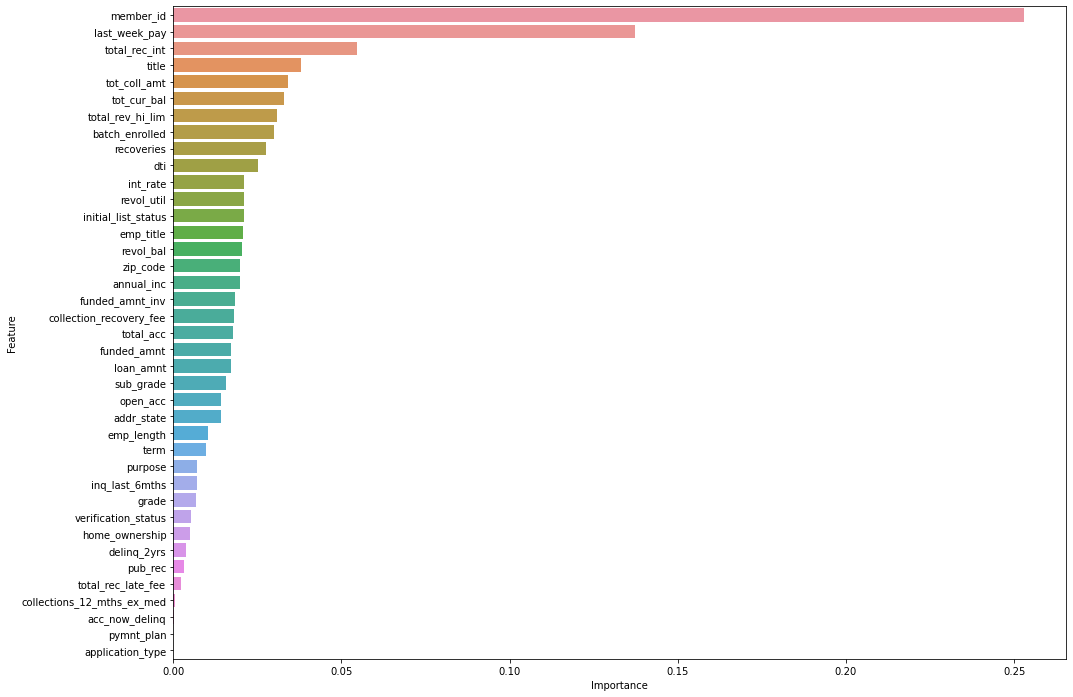

In [51]:
plt.figure(figsize=(16,12))
sns.barplot(x='Importance',y='Feature',data=feature_imp_corr)
plt.show()

In [52]:
#Taking important features and repeating same process
ft_corr=feature_imp_corr['Feature'][:15]

In [53]:
flt_corr=[]
for i in ft_corr:
    flt_corr.append(i)

In [56]:
x_train_flt=x_train_scaled.filter(flt_corr)
x_test_flt=X_test_scaled.filter(flt_corr)

In [57]:
rfc_flt=RandomForest(x_train_flt,y_train,x_test_flt,y_test)

RandomForestClassifier(n_estimators=60, n_jobs=-1, oob_score=True,
                       random_state=42) 

[[129352   4897]
 [  7366  34087]] 

Accuracy Score :  0.9302056891782677 

AUC - ROC : 0.8929138923320941 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95    134249
           1       0.87      0.82      0.85     41453

    accuracy                           0.93    175702
   macro avg       0.91      0.89      0.90    175702
weighted avg       0.93      0.93      0.93    175702
 



##### Here, we can see randomforest with imporant features, it is giving good results.

In [73]:
LR_model= LogisticRegression(n_jobs=-1,)
y_test7_pred_cv=LR_model.fit(x_train_flt,y_train).predict(x_test_flt)
print(LR_model)
print(confusion_matrix(y_test,y_test7_pred_cv),'\n')
print('Accuracy Score : ',accuracy_score(y_test,y_test7_pred_cv),'\n')
print('AUC - ROC :',roc_auc_score(y_test,y_test7_pred_cv),'\n')
print(classification_report(y_test,y_test7_pred_cv),'\n')

LogisticRegression(n_jobs=-1)
[[123701  10548]
 [ 16378  25075]] 

Accuracy Score :  0.8467518867172826 

AUC - ROC : 0.7631657597384395 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90    134249
           1       0.70      0.60      0.65     41453

    accuracy                           0.85    175702
   macro avg       0.79      0.76      0.78    175702
weighted avg       0.84      0.85      0.84    175702
 



In [63]:
rfc_flt_prob=RandomForestClassifier(n_estimators=60, n_jobs=-1, oob_score=True,
                       random_state=42)
y_test_probability=rfc_flt_prob.fit(x_train_flt,y_train).predict_proba(x_test_flt)


In [74]:
y_test_probability[1]

array([0.96666667, 0.03333333])

### Training the model with full dataset after scaling and important features

In [65]:
X_scaled=scaler.fit_transform(X)
X_scaled= DataFrame(data=X_scaled,columns=X.columns)


In [66]:
x_scaled_flt=X_scaled.filter(flt_corr)
test_clean_flt_scaled=test_clean_df_scaled.filter(flt_corr)

### Predicting the probability that a member will default.

In [67]:
probability=rfc_flt_prob.fit(x_scaled_flt,y).predict_proba(test_clean_flt_scaled)

In [68]:
test_clean_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,1,48,16.24,2,14,27658,4,4,73500.0,1,0,1,27945,425,35,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,0,3915.61,0.0,0.0,0.0,0.0,0,2,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,1,38,9.49,1,6,91075,5,0,105000.0,1,0,6,13629,256,27,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,1,1495.06,0.0,0.0,0.0,0.0,0,75,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,1,42,15.61,3,15,26520,1,4,62300.0,0,0,2,7249,615,16,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,1,2096.21,0.0,0.0,0.0,0.0,0,79,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,1,47,12.69,2,11,848,1,3,150000.0,1,0,2,7249,868,4,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,0,1756.31,0.0,0.0,0.0,0.0,0,48,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,0,0,6.89,0,2,74128,5,0,52000.0,0,0,6,13629,642,18,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,1,172.21,0.0,0.0,0.0,0.0,0,48,0.0,0.0,234278.0,26700.0


##### Fetching probability of being default

In [81]:
probability_def=[]
for prob in probability:
    probability_def.append(round(prob[1],2))


In [82]:
probability_def

[0.3,
 0.33,
 0.37,
 0.23,
 0.02,
 0.3,
 0.93,
 0.37,
 0.55,
 0.53,
 0.77,
 0.65,
 0.17,
 0.05,
 0.18,
 0.08,
 0.48,
 0.15,
 0.03,
 0.38,
 0.0,
 0.53,
 0.7,
 0.47,
 0.42,
 0.32,
 0.02,
 0.38,
 0.1,
 0.13,
 0.08,
 0.83,
 0.13,
 0.8,
 0.15,
 0.53,
 0.33,
 0.12,
 0.25,
 0.13,
 0.95,
 0.65,
 0.15,
 0.08,
 0.38,
 0.43,
 0.28,
 0.12,
 0.07,
 0.38,
 0.1,
 0.12,
 0.05,
 0.8,
 0.07,
 0.37,
 0.83,
 0.05,
 0.8,
 0.57,
 0.47,
 0.03,
 0.85,
 0.4,
 0.5,
 0.92,
 0.53,
 0.1,
 0.07,
 0.82,
 0.48,
 0.42,
 0.97,
 0.47,
 0.47,
 0.33,
 0.12,
 0.7,
 0.33,
 0.07,
 0.28,
 0.08,
 0.18,
 0.7,
 0.25,
 0.45,
 0.87,
 0.15,
 0.03,
 0.48,
 0.03,
 0.25,
 0.87,
 0.08,
 0.8,
 0.12,
 0.93,
 0.15,
 0.3,
 0.0,
 0.53,
 0.4,
 0.52,
 0.08,
 0.27,
 0.15,
 0.13,
 0.48,
 0.13,
 0.23,
 0.35,
 0.9,
 0.35,
 0.62,
 0.5,
 0.15,
 0.72,
 0.8,
 0.08,
 0.63,
 0.88,
 0.73,
 0.5,
 0.93,
 0.37,
 0.35,
 0.65,
 0.82,
 0.28,
 0.32,
 0.45,
 0.6,
 0.92,
 0.8,
 0.23,
 0.37,
 0.13,
 0.38,
 0.15,
 0.85,
 0.38,
 0.65,
 0.7,
 0.63,
 0.58,
 0.27,
 0.

In [72]:
probability

array([[0.7       , 0.3       ],
       [0.66666667, 0.33333333],
       [0.63333333, 0.36666667],
       ...,
       [0.13333333, 0.86666667],
       [0.86666667, 0.13333333],
       [0.21666667, 0.78333333]])

In [83]:
test_clean_df['loan_status']=probability_def

In [84]:
submission_csv=test_clean_df[['member_id','loan_status']]

In [85]:
submission_csv

,member_id,loan_status
0,11937648,0.30
1,38983318,0.33
2,27999917,0.37
3,61514932,0.23
4,59622821,0.02
...,...,...
354946,19145105,0.57
354947,46304777,0.37
354948,903745,0.87
354949,53032475,0.13


In [86]:
submission_csv.to_csv('submission.csv')